## Global Settings

In [206]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"  # for easier sharing the charts, e.g., on github, needs: pip install -U kaleido

In [207]:
DEFAULT_RI_PIPELINES = ['NATIVE-RIPPER', 'LENC-CART:4', 'TREES-BRCG', 'TREES-CORELS', 'NATIVE-R2N']
RIPPER_PIPELINES = ['QUANTILE-RIPPER', 'TREES-RIPPER', 'NATIVE-RIPPER2', 'NATIVE-RIPPER3', 'NATIVE-RIPPER']
BRCG_PIPELINES = ['QUANTILE-BRCG', 'TREES-BRCG2', 'QUANTILE-BRCG2', 'TREES2-BRCG2', 'TREES2-BRCG', 'TREES-BRCG']
CORELS_PIPELINES = ['QUANTILE-CORELS','TREES-CORELS2', 'TREES2-CORELS2', 'TREES-CORELS']
CART_PIPELINES = ['LENC-CART:*', 'LENC-CART:6', 'LENC-CART:4']
ALL_RI_PIPELINES = RIPPER_PIPELINES + BRCG_PIPELINES + CORELS_PIPELINES + CART_PIPELINES + ['NATIVE-R2N']
ALL_PIPELINES = ALL_RI_PIPELINES + ['LENC-XGB']
DEFAULT_PIPELINES = DEFAULT_RI_PIPELINES + ['LENC-XGB']

metrics = ['f2', 'recall', 'precision', 'acc', 'adj_bal_acc', 'sum_preds']
style_map = {
    'LENC-XGB': ('gray', 'solid', 'circle'),
    'LENC-CART:4': ('mediumblue', 'dot', 'arrow-right'), 
    'LENC-CART:6': ('cornflowerblue', 'longdash', 'diamond'), 
    'LENC-CART:*': ('lightskyblue', 'solid', 'arrow-left'),
    'TREES-BRCG': ('lime', 'dash', 'cross'),
    'TREES2-BRCG': ('aquamarine', 'dash', 'cross'),
    'NATIVE-RIPPER': ('crimson', 'longdash', 'diamond'),
    'NATIVE-RIPPER2': ('magenta', 'longdash', 'diamond'),
    'NATIVE-RIPPER3': ('darkorchid', 'longdash', 'diamond'),
    'QUANTILE-RIPPER': ('salmon', 'longdash', 'diamond'),
    'TREES-RIPPER': ('orangered', 'longdash', 'diamond'),
    'TREES-CORELS': ('gold', 'dashdot', 'star'),
    'TREES-CORELS2': ('darkorange', 'dashdot', 'star'),
    'TREES2-CORELS2': ('wheat', 'dashdot', 'star'),
    'NATIVE-R2N': ('silver', 'dot', 'square'),
    'QUANTILE-RULENET': ('cyan', 'dot', 'square'),
    'QUANTILE-BRCG': ('plum', 'dash', 'cross'),
    'QUANTILE-CORELS': ('palevioletred', 'dashdot', 'star'),
    'TREES-BRCG2': ('forestgreen', 'dash', 'cross'),
    'QUANTILE-BRCG2': ('maroon', 'dash', 'cross'),
    'TREES2-BRCG2': ('yellowgreen', 'solid', 'cross'),
    'maxRI': ('crimson', 'solid', 'cross'),
    'maxRI50': ('orangered', 'solid', 'cross'),
    'maxRI25': ('darkorange', 'solid', 'cross'),
    'maxRI10': ('gold', 'solid', 'cross'),
    'maxRI5': ('palegoldenrod', 'solid', 'cross')
}

color_map = {}
for pipeline in style_map:
    for m in metrics:
        name = pipeline + '_' + m
        color_map[name] = style_map[pipeline][0]

def rename( pipeline ):
    if pipeline == 'LENC-XGB':
        return 'xgb'
    else:
        return pipeline
    
long_name = {
    'f2': 'f2-score',
    'f': 'f-score',
    'acc': 'accuracy',
    'adj_bal_acc': 'balanced accuracy',
    'nof_rules': 'number of rules',
    'sum_preds': 'sum of predicates',
    'avg_preds': 'average of predicates',
    'max_preds': 'maximum of predicates'
}

In [208]:
def single_chart(pipelines, metric, df, df_long_name, x_sel='data_set', x_title=None, x_log=False):
    fig = go.Figure(layout=dict(title=dict(text=long_name[metric]+' on '+df_long_name)))
    for p in pipelines:
        m = p + '_' + metric
        fig.add_scatter(name=rename(p), 
                        x=df[x_sel], 
                        y=df[m], 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=True)
    fig.update_layout(yaxis_title=long_name[metric], plot_bgcolor='whitesmoke')
    if x_title is not None:
        fig.update_layout(xaxis_title=x_title)
    if x_log:
        fig.update_xaxes(type="log")
    fig.update_layout(height=400, width=1000)
    fig.show()


def triple_chart(pipelines, performance_metric, complexity_metric, df, df_long_name, x_sel='data_set', x_title=None, x_log=False):

    fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

    for p in ['LENC-XGB'] + pipelines:
        m = p + '_' + performance_metric
        scatter = go.Scatter(name=p, 
                        x=df[x_sel], 
                        y=df[m], 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=True)
        fig.add_trace(scatter, row=3, col=1)
    fig.update_yaxes(title=long_name[performance_metric], row=3, col=1)
    if x_title is not None:
        fig.update_xaxes(title=x_title, row=3, col=1)

    for p in pipelines:
        m = p + '_' + complexity_metric
        scatter = go.Scatter(name=p, 
                        x=df[x_sel],
                        y=df[m]+1, 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=False)
        fig.add_trace(scatter, row=2, col=1)
    fig.update_yaxes(type="log", row=2, col=1)
    fig.update_yaxes(title=long_name[complexity_metric], row=2, col=1)

    metric = 'runtime'
    for p in ['LENC-XGB'] + pipelines:
        m = p + '_' + metric
        scatter = go.Scatter(name=p, 
                        x=df[x_sel],
                        y=df[m]+1, 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=False)
        fig.add_trace(scatter, row=1, col=1)
    fig.update_yaxes(type="log", row=1, col=1)
    fig.update_yaxes(title='time (secs)', row=1, col=1)

    if x_log:
        fig.update_xaxes(type="log")

    fig.update_layout(title_text=long_name[performance_metric]+', '+ long_name[complexity_metric] + ' and training time on ' + df_long_name, plot_bgcolor='whitesmoke')
    fig.update_layout(height=600, width=1000)
    fig.show()


def dual_chart(pipelines, performance_metric, complexity_metric, df, df_long_name, x_sel='data_set', x_title=None, x_log=False):

    fig = make_subplots(rows=2, cols=1,
                        shared_xaxes=True,
                        vertical_spacing=0.02)

    for p in ['LENC-XGB'] + pipelines:
        m = p + '_' + performance_metric
        scatter = go.Scatter(name=p, 
                        x=df[x_sel], 
                        y=df[m], 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=True)
        fig.add_trace(scatter, row=2, col=1)
    fig.update_yaxes(title=long_name[performance_metric], row=2, col=1)
    if x_title is not None:
        fig.update_xaxes(title=x_title, row=2, col=1)

    for p in pipelines:
        m = p + '_' + complexity_metric
        scatter = go.Scatter(name=p, 
                        x=df[x_sel],
                        y=df[m]+1, 
                        mode='markers+lines', 
                        line=dict(width=2,color=style_map[p][0],dash=style_map[p][1]),
                        marker=dict(symbol=style_map[p][2]), # color='red', size=2, 
                        showlegend=False)
        fig.add_trace(scatter, row=1, col=1)
    fig.update_yaxes(type="log", row=1, col=1)
    fig.update_yaxes(title=long_name[complexity_metric], row=1, col=1)

    if x_log:
        fig.update_xaxes(type="log")

    fig.update_layout(title_text=long_name[performance_metric]+' and '+ long_name[complexity_metric] + ' on ' + df_long_name, plot_bgcolor='whitesmoke')
    fig.update_layout(height=500, width=1000)
    fig.show()

In [209]:
full_df = pd.read_csv('results_1.csv')
full_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,TREES-RIPPER_f,TREES-RIPPER_nof_rules,TREES-RIPPER_sum_preds,TREES-RIPPER_max_preds,TREES-RIPPER_avg_preds,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception
0,german_credit,1000,21,7,13,300,0.3000,credit,organic,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,taiwan_credit,30000,24,14,9,6636,0.2212,credit,organic,23.0,...,0.00,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
2,compas,7210,8,0,7,3250,0.4508,recidivism,organic,7.0,...,0.00,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
3,fraud_detection,284807,31,30,0,492,0.0017,transaction-fraud,organic,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fraud_oracle,15420,33,8,24,923,0.0599,insurance-fraud,organic,32.0,...,0.17,14.0,66.0,7.0,4.71,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,synth_size_5120,5120,2,1,0,2581,0.5041,other,synthetic,1.0,...,1.00,1.0,1.0,1.0,1.00,NaN,NaN,NaN,NaN,NaN
89,synth_size_10240,10240,2,1,0,5068,0.4949,other,synthetic,1.0,...,1.00,1.0,1.0,1.0,1.00,NaN,NaN,NaN,NaN,NaN
90,synth_size_20480,20480,2,1,0,10163,0.4962,other,synthetic,1.0,...,1.00,1.0,1.0,1.0,1.00,NaN,NaN,NaN,NaN,NaN
91,synth_size_40960,40960,2,1,0,20419,0.4985,other,synthetic,1.0,...,1.00,1.0,1.0,1.0,1.00,NaN,NaN,NaN,NaN,NaN


In [210]:
# Enriching result table

def max_f2(row):
    l = [ row[p+'_f2'] for p in ALL_RI_PIPELINES ]
    return max(l)

def max_f2_rules(row, max_rules=25):
    l = [ row[p+'_f2'] for p in ALL_RI_PIPELINES if row[p+'_nof_rules'] <= max_rules ]
    if len(l) == 0:
        return 0
    return max(l)

full_df['maxRI_f2'] = full_df.apply(max_f2, axis=1)
full_df['maxRI50_f2'] = full_df.apply(max_f2_rules, max_rules=50, axis=1)
full_df['maxRI25_f2'] = full_df.apply(max_f2_rules, max_rules=25, axis=1)
full_df['maxRI10_f2'] = full_df.apply(max_f2_rules, max_rules=10, axis=1)
full_df['maxRI5_f2'] = full_df.apply(max_f2_rules, max_rules=5, axis=1)
# full_df

## Core Suite Definition and Stats


In [211]:
df_core_suite = full_df[(full_df['origin']=='organic') & (full_df['use_case']!='other')]
df_core_suite = df_core_suite.sort_values('pos_ratio', ignore_index=True)

df_core_suite

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
0,fraud_detection,284807,31,30,0,492,0.0017,transaction-fraud,organic,30.0,...,NaN,NaN,NaN,NaN,NaN,0.75,0.75,0.75,0.74,0.70
1,bike_75,8760,14,9,4,61,0.0070,demand-prediction,organic,13.0,...,NaN,NaN,NaN,NaN,NaN,0.57,0.57,0.57,0.57,0.56
2,fraud_oracle,15420,33,8,24,923,0.0599,insurance-fraud,organic,32.0,...,NaN,NaN,NaN,NaN,NaN,0.34,0.34,0.34,0.06,0.06
3,orange_churn,50000,213,174,38,3672,0.0734,churn,organic,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,0.02,0.02
4,orange_up,50000,213,174,38,3682,0.0736,product recommendation,organic,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.49,0.48,0.48
5,bank_marketing,4118,21,10,10,451,0.1095,product_recommendation,organic,20.0,...,NaN,NaN,NaN,NaN,NaN,0.51,0.49,0.49,0.49,0.39
6,telco_churn,3333,20,16,3,483,0.1449,churn,organic,19.0,...,NaN,NaN,NaN,NaN,NaN,0.80,0.80,0.80,0.80,0.65
7,taiwan_credit,30000,24,14,9,6636,0.2212,credit,organic,23.0,...,NaN,NaN,NaN,NaN,NaN,0.41,0.37,0.37,0.36,0.36
8,adult,32561,13,4,8,7841,0.2408,income_prediction,organic,12.0,...,NaN,NaN,NaN,NaN,NaN,0.71,0.71,0.71,0.71,0.71
9,house,22784,17,16,0,6744,0.2960,price_prediction,organic,16.0,...,NaN,NaN,NaN,NaN,NaN,0.76,0.76,0.75,0.75,0.75


In [212]:
df_basic_stats = df_core_suite[['data_set', 'use_case', 'nof_rows', 'nof_col', 'nof_num_features', 'nof_cat_features', 'pos_ratio', 'LENC-XGB_f2']]
df_basic_stats = df_basic_stats.sort_values('LENC-XGB_f2', ignore_index=True)
df_basic_stats
# latex_table = df_basic_stats.to_latex(index=False)
# latex_table = latex_table.replace('\_', ' ')
# latex_table = latex_table.replace('-', ' ')
# print(latex_table)

# for x in trans_map:
#         latex_table = latex_table.replace(x, trans_map[x])

,data_set,use_case,nof_rows,nof_col,nof_num_features,nof_cat_features,pos_ratio,LENC-XGB_f2
0,orange_churn,churn,50000,213,174,38,0.0734,0.03
1,fraud_oracle,insurance-fraud,15420,33,8,24,0.0599,0.36
2,taiwan_credit,credit,30000,24,14,9,0.2212,0.40
3,german_credit,credit,1000,21,7,13,0.3000,0.44
4,orange_up,product recommendation,50000,213,174,38,0.0736,0.47
5,bike_75,demand-prediction,8760,14,9,4,0.0070,0.48
6,bank_marketing,product_recommendation,4118,21,10,10,0.1095,0.49
7,compas,recidivism,7210,8,0,7,0.4508,0.57
8,heloc,credit,10459,24,23,0,0.4781,0.67
9,telco_churn_2,churn,2000,14,9,4,0.5000,0.68


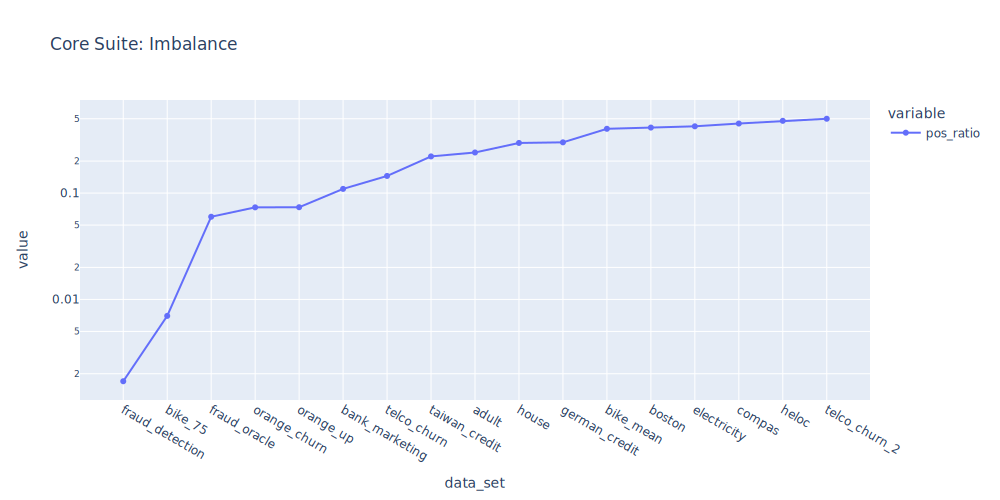

In [213]:
fig = px.line(df_core_suite, x='data_set', y=['pos_ratio'], log_y=True, title='Core Suite: Imbalance')
fig.update_traces(mode='markers+lines')
fig.update_layout(height=500, width=1000)
fig.show()

## General Performance on Core Suite

### Result Table

In [214]:
trans_map = {
    'LENC-XGB': 'xgb/',
    'NATIVE-RIPPER': 'rip/',
    'TREES-BRCG': 'brcg/',
    'TREES-CORELS': 'cor/',
    'NATIVE-R2N': 'r2n/',
    '\_f2': 'f2',
    '\_recall': 're',
    '\_precision': 'pr',
    '\_adj\_bal\_acc': 'ba',
    '\_acc': 'acc',
    '\_nof\_rules': 'nor',
    '\_sum\_preds': 'sop'
}

# Create table
pipelines = DEFAULT_PIPELINES
metrics = ['f2', 'recall', 'precision', 'adj_bal_acc']  # 'f', 'acc'
cols = ['data_set'] + [p+'_'+m for m in metrics for p in pipelines]
df = df_core_suite[cols]
df = df.sort_values('LENC-XGB_f2', ignore_index=True)
# latex_table = df.to_latex(index=False, longtable=True)
# for x in trans_map:
#         latex_table = latex_table.replace(x, trans_map[x])
# # print(latex_table)
df

,data_set,NATIVE-RIPPER_f2,LENC-CART:4_f2,TREES-BRCG_f2,TREES-CORELS_f2,NATIVE-R2N_f2,LENC-XGB_f2,NATIVE-RIPPER_recall,LENC-CART:4_recall,TREES-BRCG_recall,...,TREES-BRCG_precision,TREES-CORELS_precision,NATIVE-R2N_precision,LENC-XGB_precision,NATIVE-RIPPER_adj_bal_acc,LENC-CART:4_adj_bal_acc,TREES-BRCG_adj_bal_acc,TREES-CORELS_adj_bal_acc,NATIVE-R2N_adj_bal_acc,LENC-XGB_adj_bal_acc
0,orange_churn,0.00,0.02,0.00,0.00,NaN,0.03,0.00,0.02,0.00,...,1.00,1.00,NaN,0.47,0.00,0.02,0.00,0.00,NaN,0.03
1,fraud_oracle,0.00,0.04,0.00,0.00,0.00,0.36,0.00,0.04,0.00,...,1.00,1.00,1.00,0.80,0.00,0.03,0.00,0.00,0.00,0.31
2,taiwan_credit,0.37,0.33,0.34,0.34,0.33,0.40,0.33,0.30,0.30,...,0.70,0.70,0.70,0.66,0.28,0.26,0.26,0.26,0.26,0.31
3,german_credit,0.20,0.52,0.23,0.11,0.00,0.44,0.17,0.51,0.20,...,0.68,0.67,1.00,0.51,0.12,0.36,0.16,0.07,0.00,0.26
4,orange_up,0.45,0.48,0.48,0.48,NaN,0.47,0.41,0.43,0.43,...,0.81,0.80,NaN,0.84,0.40,0.42,0.42,0.42,NaN,0.41
5,bike_75,0.57,0.56,0.00,0.00,0.00,0.48,0.60,0.60,0.00,...,1.00,1.00,1.00,0.54,0.60,0.60,0.00,0.00,0.00,0.46
6,bank_marketing,0.42,0.41,0.37,0.37,0.32,0.49,0.40,0.39,0.34,...,0.56,0.58,0.62,0.54,0.35,0.35,0.31,0.31,0.27,0.43
7,compas,0.00,0.57,0.57,0.52,0.52,0.57,0.00,0.55,0.55,...,0.68,0.67,0.67,0.68,0.00,0.32,0.33,0.28,0.28,0.33
8,heloc,0.70,0.65,0.63,0.63,0.82,0.67,0.71,0.64,0.61,...,0.74,0.74,0.49,0.71,0.42,0.42,0.41,0.41,0.02,0.41
9,telco_churn_2,0.66,0.61,0.63,0.65,0.84,0.68,0.65,0.58,0.61,...,0.77,0.75,0.58,0.76,0.37,0.42,0.42,0.42,0.25,0.45


### Performance of rule induction vs. XGBoost

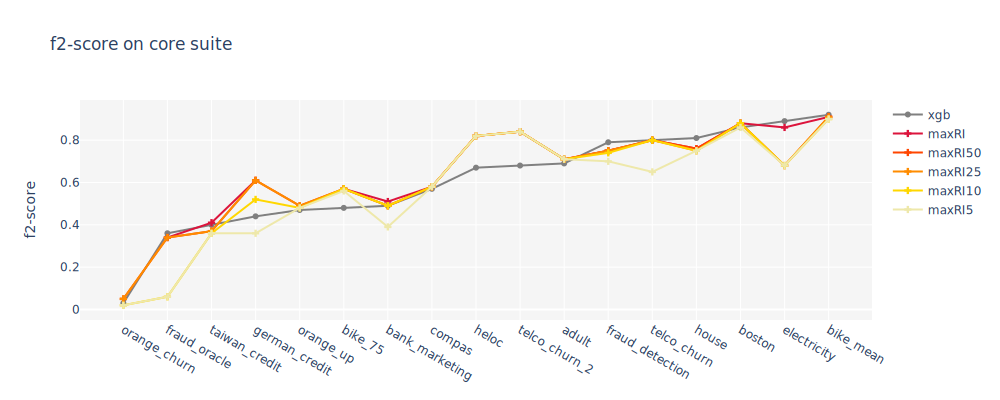

In [215]:
sorted_df = df_core_suite.sort_values('LENC-XGB_f2', ignore_index=True)
single_chart(pipelines=['LENC-XGB', 'maxRI', 'maxRI50', 'maxRI25', 'maxRI10', 'maxRI5'], metric='f2', df=sorted_df, df_long_name='core suite')

### Pipelines with standard settings on core suite

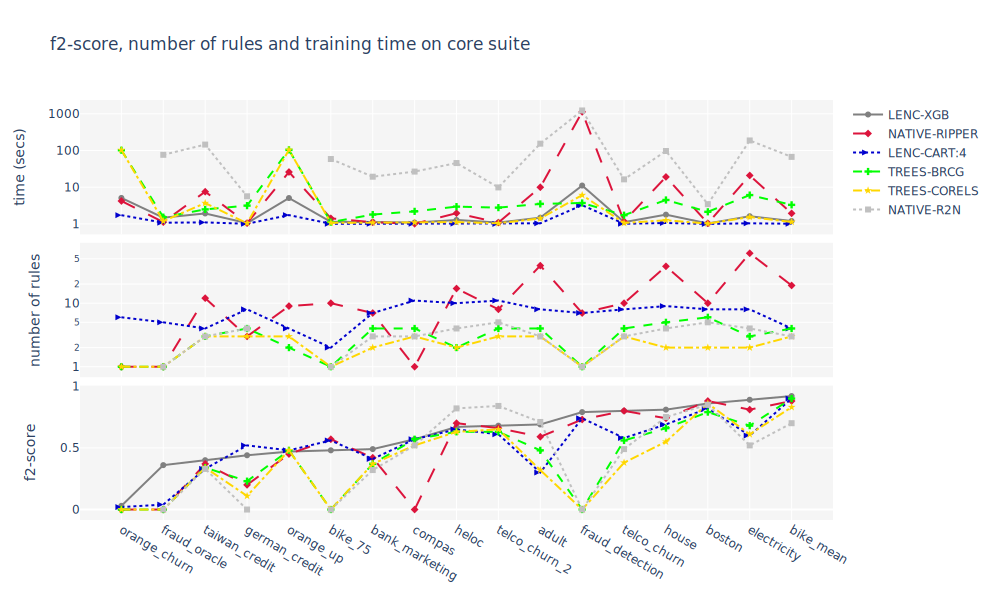

In [216]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=DEFAULT_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

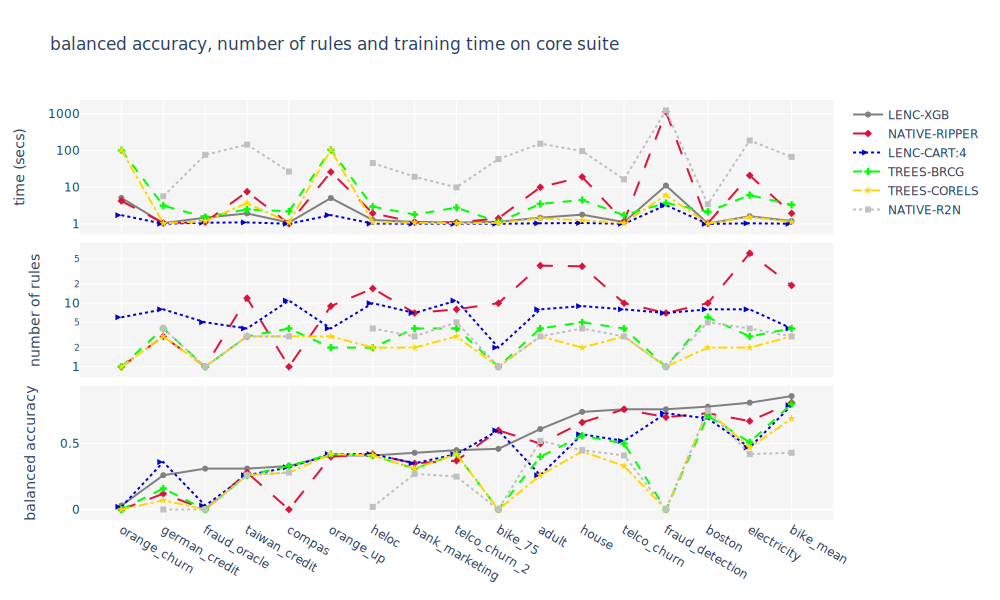

In [217]:
perf_metric = 'adj_bal_acc'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=DEFAULT_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

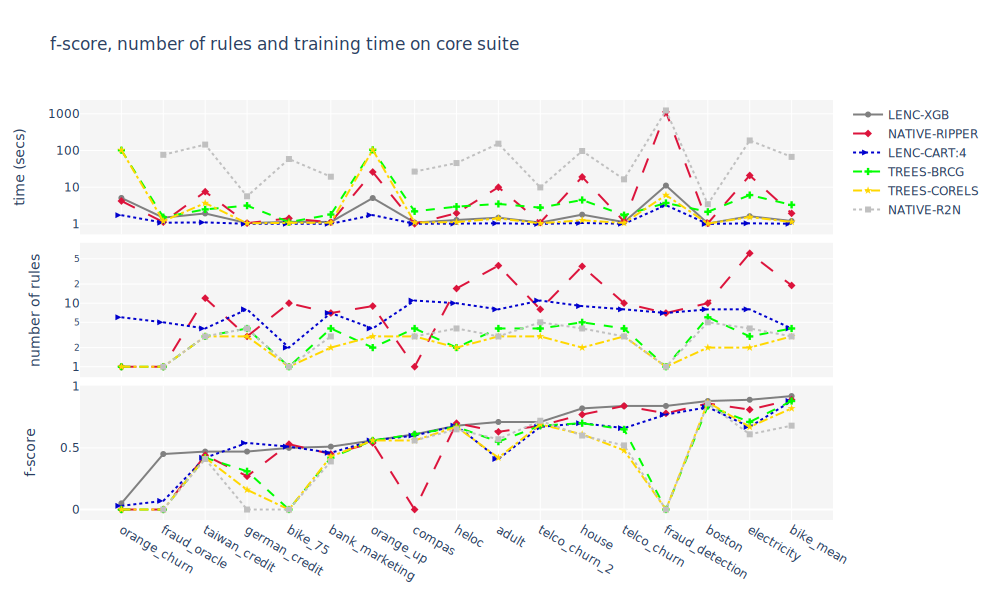

In [218]:
perf_metric = 'f'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=DEFAULT_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

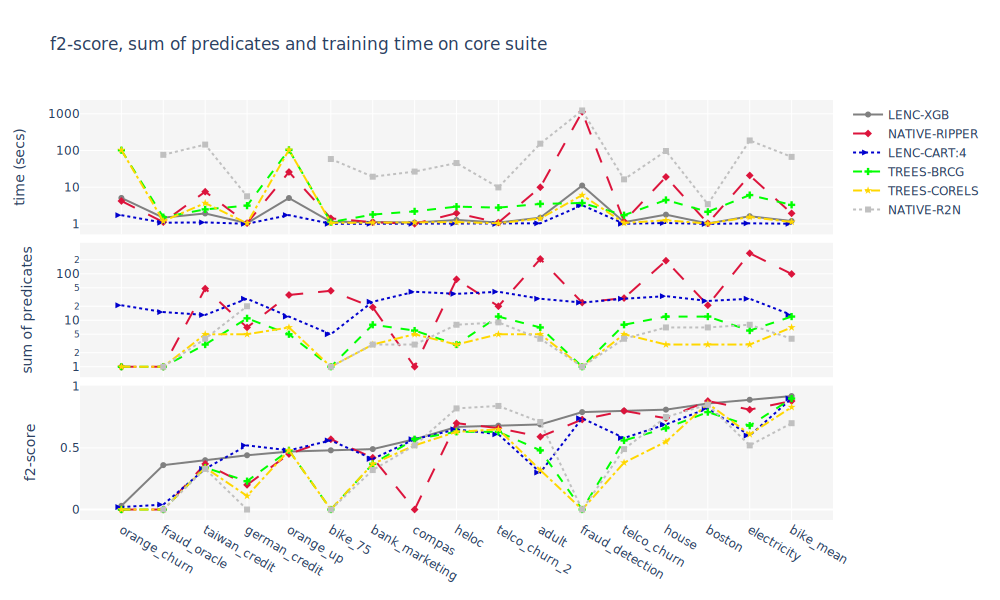

In [219]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=DEFAULT_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='sum_preds', df=sorted_df, df_long_name='core suite')

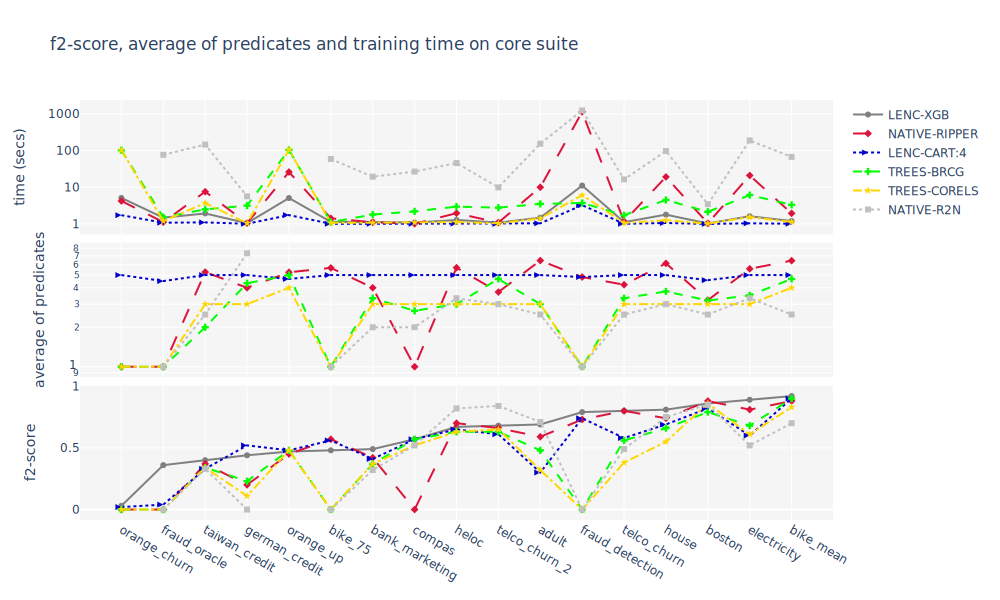

In [220]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=DEFAULT_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='avg_preds', df=sorted_df, df_long_name='core suite')

## Pipelines with non-standard configurations on core suite

### Overview: All pipelines

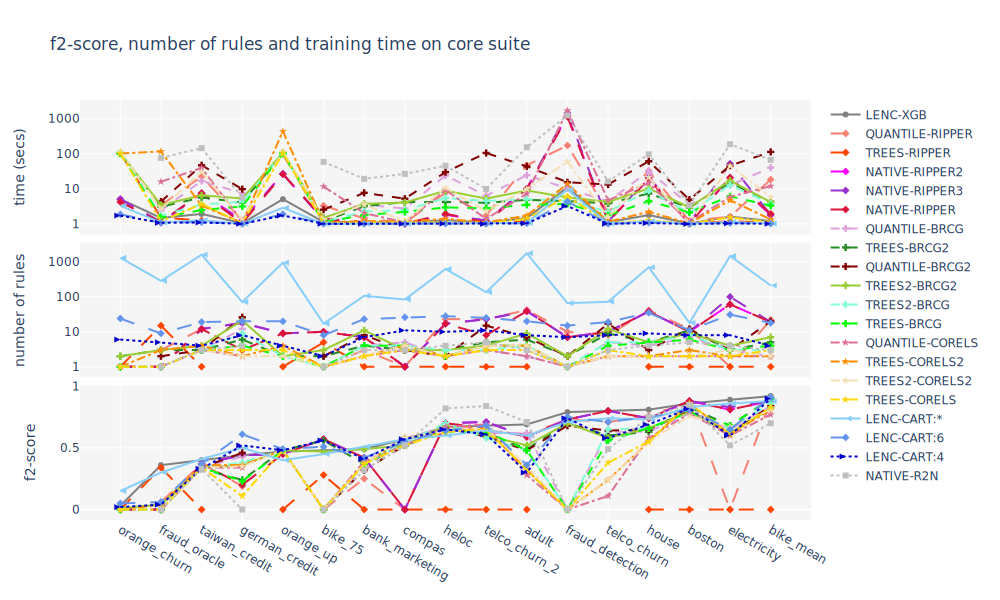

In [221]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=ALL_RI_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

### CART

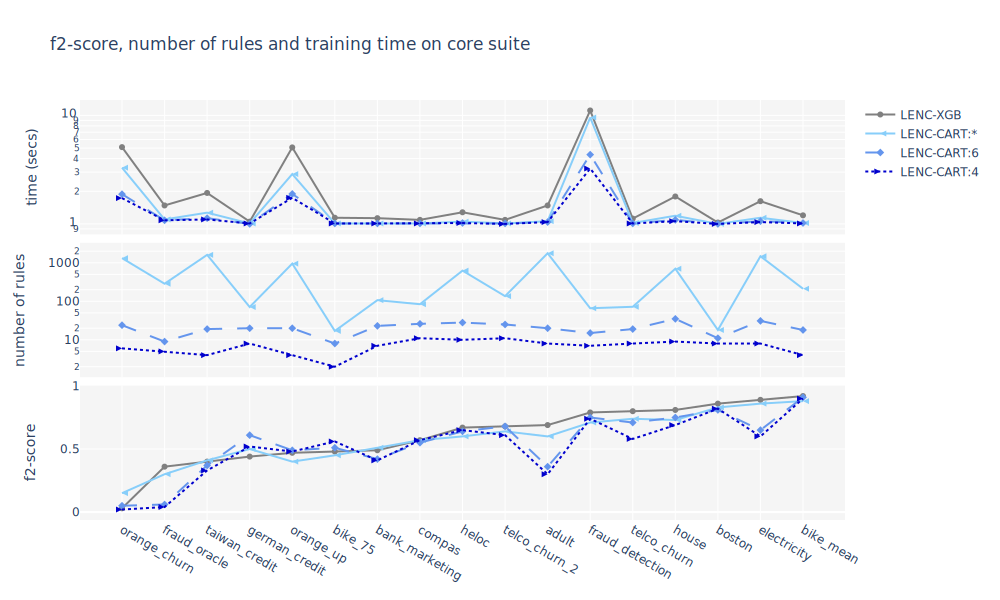

In [222]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=CART_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')
# dual_chart(pipelines=CART_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

### BRCG

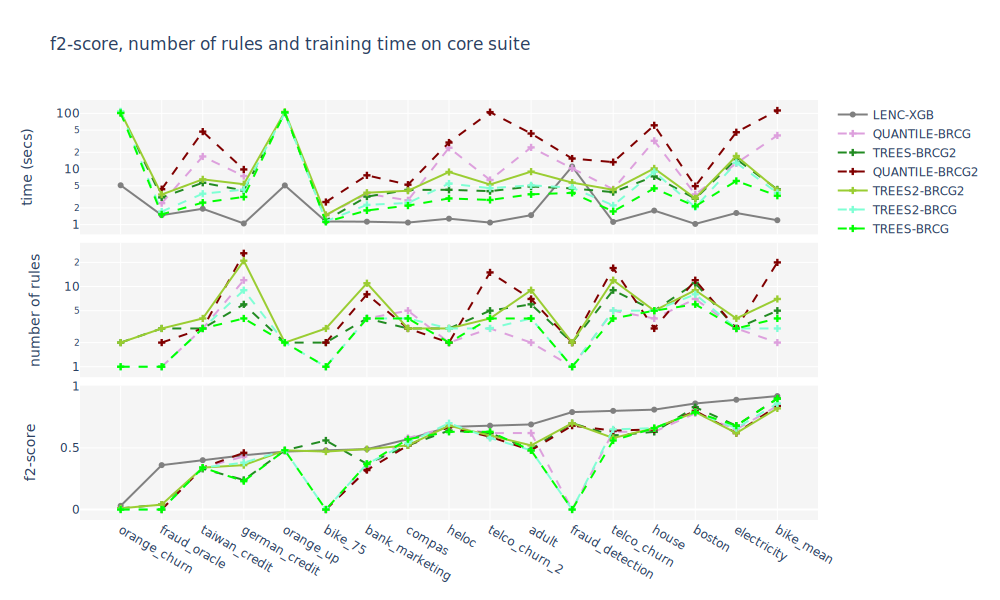

In [223]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=BRCG_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

### CORELS

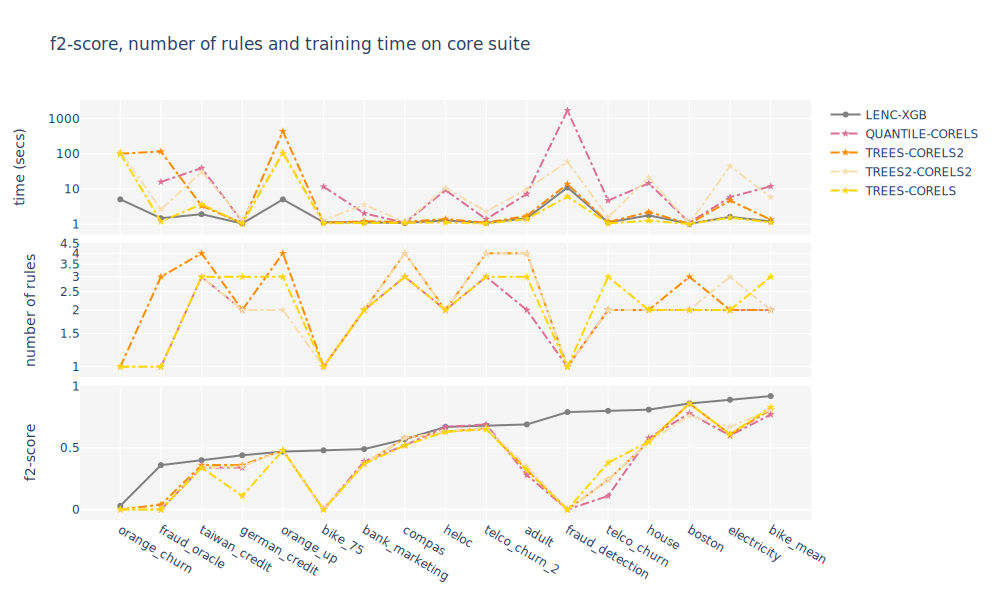

In [224]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=CORELS_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

### RIPPER

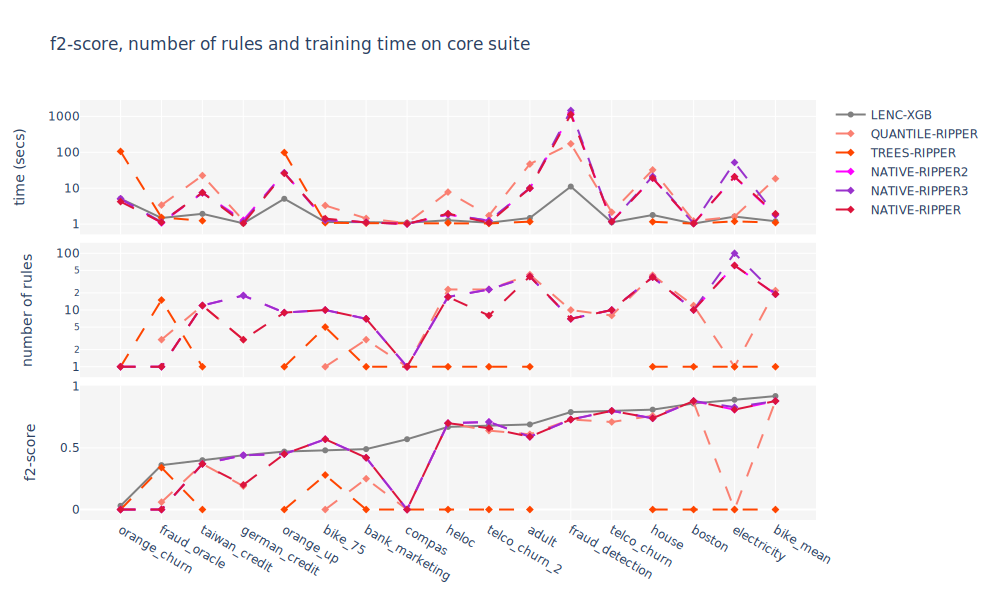

In [225]:
perf_metric = 'f2'
sorted_df = df_core_suite.sort_values('LENC-XGB_'+perf_metric, ignore_index=True)
triple_chart(pipelines=RIPPER_PIPELINES, performance_metric=perf_metric, complexity_metric='nof_rules', df=sorted_df, df_long_name='core suite')

## Synthetic Suites

### Synthetic Imbalance Suite

In [226]:
synth_imbalance_suite = [name for name in full_df['data_set'] if name.startswith('synth_ib')]
synth_imbalance_suite_df = full_df[full_df['data_set'].isin(synth_imbalance_suite)]
synth_imbalance_suite_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
17,synth_ib_0,100000,4,3,0,50140,0.5014,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
18,synth_ib_1,100000,4,3,0,24904,0.2490,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
19,synth_ib_2,100000,4,3,0,12540,0.1254,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
20,synth_ib_3,100000,4,3,0,6330,0.0633,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
21,synth_ib_4,100000,4,3,0,3205,0.0320,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
22,synth_ib_5,100000,4,3,0,1492,0.0149,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
23,synth_ib_6,100000,4,3,0,758,0.0076,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
24,synth_ib_7,100000,4,3,0,422,0.0042,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
25,synth_ib_8,100000,4,3,0,188,0.0019,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
26,synth_ib_9,100000,4,3,0,111,0.0011,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00


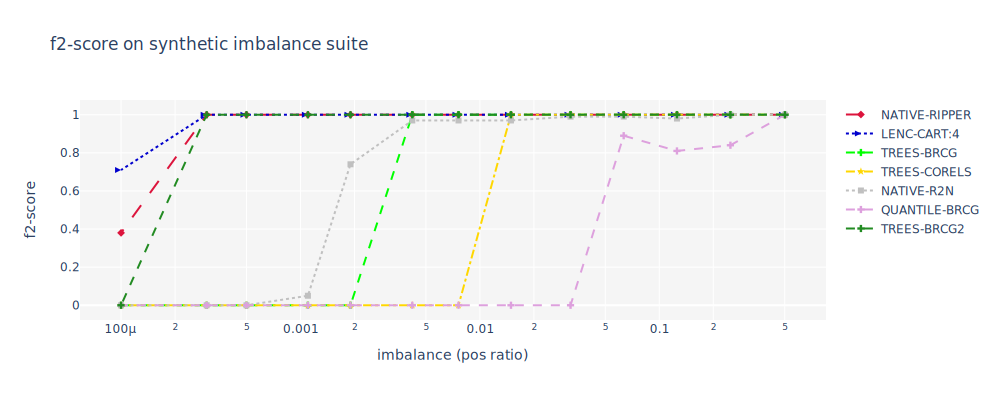

In [227]:
perf_metric = 'f2'
fig = single_chart(pipelines=DEFAULT_RI_PIPELINES+['QUANTILE-BRCG', 'TREES-BRCG2'], 
                   metric='f2', 
                   df=synth_imbalance_suite_df,
                   df_long_name='synthetic imbalance suite', 
                   x_sel='pos_ratio',
                   x_title='imbalance (pos ratio)',
                   x_log=True)

### Synthetic Noise Suite

In [228]:
synth_noise_suite = [name for name in full_df['data_set'] if name.startswith('synth_noise')]
synth_noise_suite_df = full_df[full_df['data_set'].isin(synth_noise_suite)].copy()
synth_noise_suite_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
30,synth_noise_0,50000,4,3,0,24986,0.4997,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
31,synth_noise_1,50000,4,3,0,25121,0.5024,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,0.89,0.89,0.89,0.89,0.89
32,synth_noise_2,50000,4,3,0,25121,0.5024,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.80,0.80,0.80,0.80
33,synth_noise_3,50000,4,3,0,24819,0.4964,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.70,0.70,0.70,0.70
34,synth_noise_325,50000,4,3,0,24879,0.4976,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.68,0.68,0.68,0.68
35,synth_noise_350,50000,4,3,0,24910,0.4982,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.66,0.66,0.66,0.66
36,synth_noise_375,50000,4,3,0,25076,0.5015,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.63,0.63,0.63,0.63
37,synth_noise_400,50000,4,3,0,24648,0.4930,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.83,0.83,0.61,0.61
38,synth_noise_425,50000,4,3,0,25041,0.5008,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.83,0.83,0.58,0.58
39,synth_noise_450,50000,4,3,0,25030,0.5006,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.83,0.57,0.57,0.55


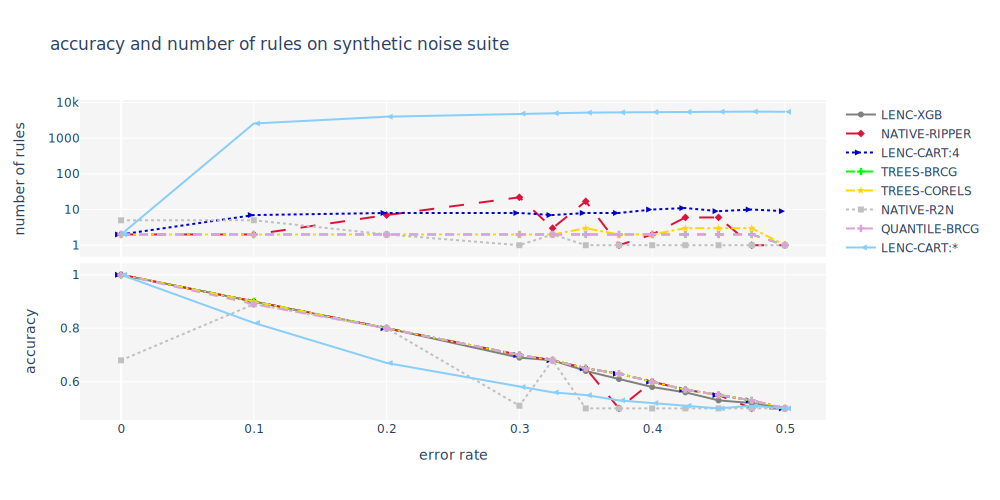

In [229]:
def extract(name):
    number = name.split('_')[2]
    noise_level = float('0.'+number)
    return noise_level

synth_noise_suite_df['error_rate'] = synth_noise_suite_df['data_set'].map(extract)
dual_chart(pipelines=DEFAULT_RI_PIPELINES+['QUANTILE-BRCG', 'LENC-CART:*'],
           performance_metric='acc',
           complexity_metric='nof_rules',
           df=synth_noise_suite_df,
           df_long_name='synthetic noise suite',
           x_sel='error_rate',
           x_title='error rate')

### Synthetic Disjunctive Complexity Suite

In [230]:
suite = [name for name in full_df['data_set'] if name.startswith('synth_disj_')]
disj_df = full_df[full_df['data_set'].isin(suite)].copy()
disj_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
42,synth_disj_1,100000,4,3,0,50105,0.5010,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
43,synth_disj_10,100000,4,3,0,49743,0.4974,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,0.57
44,synth_disj_100,100000,4,3,0,50471,0.5047,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,0.84,0.84,0.84,0.84
45,synth_disj_1000,100000,4,3,0,49821,0.4982,other,synthetic,3.0,...,training,export,NaN,NaN,NaN,NaN,0.83,0.43,0.43,0.43
46,synth_disj_2,100000,4,3,0,50010,0.5001,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
47,synth_disj_3,100000,4,3,0,50081,0.5008,other,synthetic,3.0,...,NaN,NaN,training,NaN,NaN,1.0,1.00,1.00,1.00,1.00
48,synth_disj_4,100000,4,3,0,49797,0.4980,other,synthetic,3.0,...,NaN,NaN,NaN,training,NaN,1.0,1.00,1.00,1.00,1.00
49,synth_disj_5,100000,4,3,0,50017,0.5002,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
50,synth_disj_6,100000,4,3,0,50064,0.5006,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,0.86
51,synth_disj_7,100000,4,3,0,50016,0.5002,other,synthetic,3.0,...,training,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,0.90


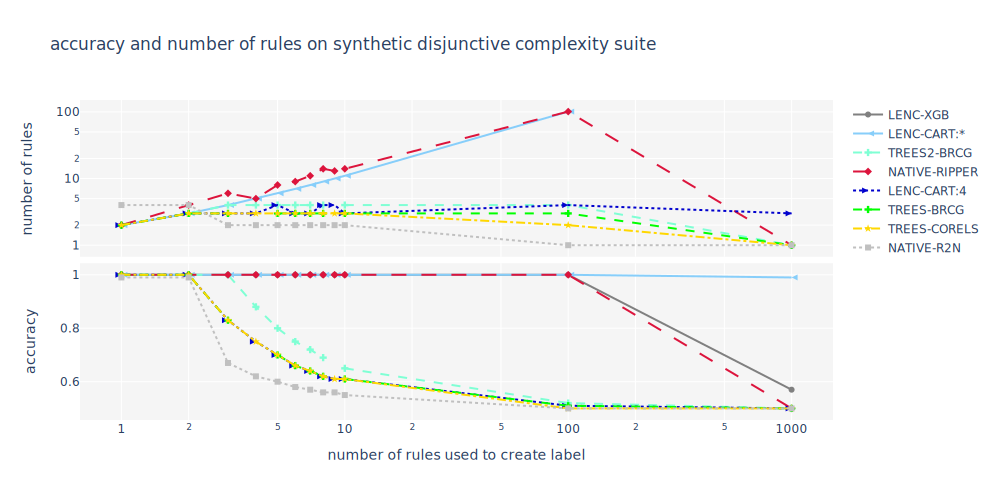

In [231]:
def extract(name):
    return int(name.split('_')[2])

disj_df['label_complexity'] = disj_df['data_set'].map(extract)
disj_df = disj_df.sort_values('label_complexity', ignore_index=True)

dual_chart(pipelines=['LENC-CART:*', 'TREES2-BRCG'] + DEFAULT_RI_PIPELINES,
           performance_metric='acc',
           complexity_metric='nof_rules',
           df=disj_df,
           df_long_name='synthetic disjunctive complexity suite',
           x_sel='label_complexity',
           x_title='number of rules used to create label',
           x_log=True)

# single_chart(pipelines=['LENC-XGB', 'LENC-CART:*', 'TREES2-BRCG'] + DEFAULT_RI_PIPELINES,
#              metric='acc',
#              df=disj_df,
#              df_long_name='synthetic disjunctive complexity suite',
#              x_sel='label_complexity',
#              x_title='number of rules used to create label',
#              x_log=True)


### Synthetic Linear Complexity Suite

In [232]:
synth_linear_suite = [name for name in full_df['data_set'] if name.startswith('synth_linear_')]
synth_linear_suite_df = full_df[full_df['data_set'].isin(synth_linear_suite)].copy()
synth_linear_suite_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
69,synth_linear_0,70000,2,1,0,34951,0.4993,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
70,synth_linear_1,70000,3,2,0,35376,0.5054,other,synthetic,2.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
71,synth_linear_2,70000,4,3,0,35090,0.5013,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00
72,synth_linear_3,70000,5,4,0,34773,0.4968,other,synthetic,4.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.77
73,synth_linear_4,70000,6,5,0,35081,0.5012,other,synthetic,5.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.83
74,synth_linear_5,70000,7,6,0,34888,0.4984,other,synthetic,6.0,...,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.76
75,synth_linear_6,70000,8,7,0,34676,0.4954,other,synthetic,7.0,...,NaN,NaN,NaN,NaN,NaN,0.89,0.82,0.82,0.82,0.78
76,synth_linear_7,70000,9,8,0,35022,0.5003,other,synthetic,8.0,...,NaN,NaN,NaN,NaN,NaN,0.88,0.85,0.85,0.85,0.79
77,synth_linear_8,70000,10,9,0,35144,0.5021,other,synthetic,9.0,...,NaN,NaN,NaN,NaN,NaN,0.99,0.99,0.99,0.99,0.99
78,synth_linear_9,70000,11,10,0,34973,0.4996,other,synthetic,10.0,...,NaN,NaN,NaN,NaN,NaN,0.86,0.86,0.86,0.86,0.86


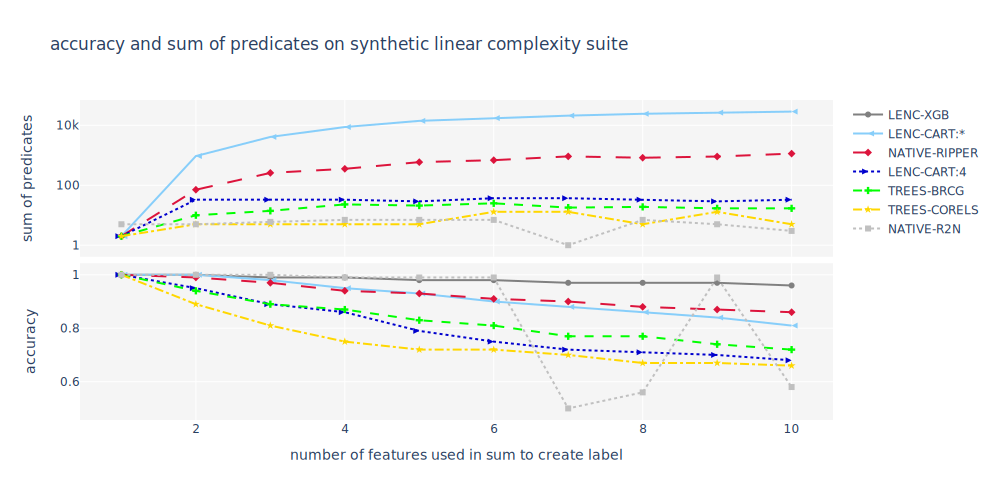

In [233]:
def extract(name):
    return int(name.split('_')[2])+1

synth_linear_suite_df['label_complexity'] = synth_linear_suite_df['data_set'].map(extract)
synth_linear_suite_df = synth_linear_suite_df.sort_values('label_complexity', ignore_index=True)

dual_chart(pipelines=['LENC-CART:*'] + DEFAULT_RI_PIPELINES,
           performance_metric='acc',
           complexity_metric='sum_preds',
           df=synth_linear_suite_df,
           df_long_name='synthetic linear complexity suite',
           x_sel='label_complexity',
           x_title='number of features used in sum to create label',
           x_log=False)

# single_chart(pipelines=['LENC-XGB', 'LENC-CART:*'] + DEFAULT_RI_PIPELINES,
#              metric='acc',
#              df=synth_linear_suite_df,
#              df_long_name='synthetic linear complexity suite',
#              x_sel='label_complexity',
#              x_title='number of features used in sum to create label',
#              x_log=False)


### Synthetic Conjunctive Complexity Suite

In [234]:
synth_conj_suite = [name for name in full_df['data_set'] if name.startswith('synth_conj_')]
synth_conj_suite_df = full_df[full_df['data_set'].isin(synth_conj_suite)].copy()
synth_conj_suite_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
54,synth_conj_0,50000,2,1,0,24835,0.4967,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
55,synth_conj_1,50000,3,2,0,25200,0.5040,other,synthetic,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
56,synth_conj_2,50000,4,3,0,24926,0.4985,other,synthetic,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
57,synth_conj_3,50000,5,4,0,24984,0.4997,other,synthetic,4.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
58,synth_conj_4,50000,6,5,0,25058,0.5012,other,synthetic,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
59,synth_conj_5,50000,7,6,0,24868,0.4974,other,synthetic,6.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
60,synth_conj_6,50000,8,7,0,25087,0.5017,other,synthetic,7.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
61,synth_conj_7,50000,9,8,0,24933,0.4987,other,synthetic,8.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
62,synth_conj_8,50000,10,9,0,24984,0.4997,other,synthetic,9.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00
63,synth_conj_9,50000,11,10,0,25110,0.5022,other,synthetic,10.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00


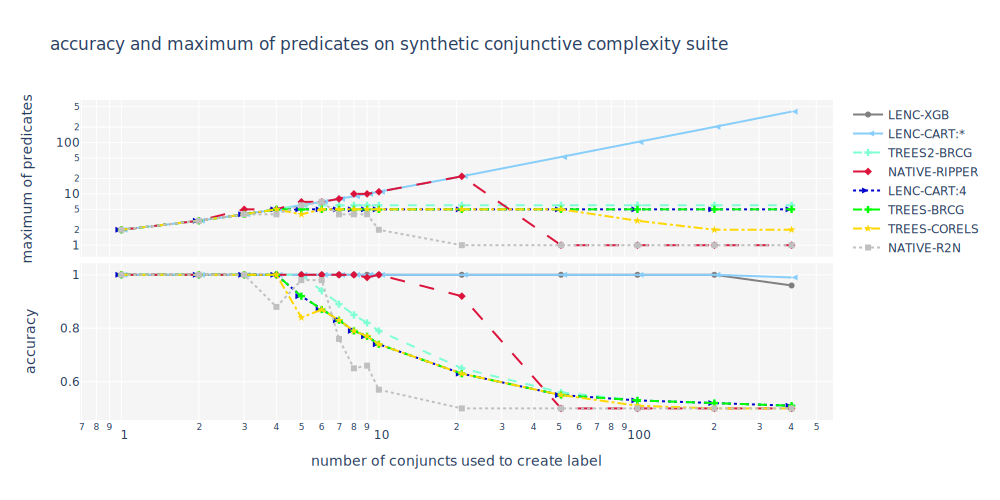

In [235]:
def extract(name):
    return int(name.split('_')[2])+1

synth_conj_suite_df['label_complexity'] = synth_conj_suite_df['data_set'].map(extract)
synth_conj_suite_df = synth_conj_suite_df.sort_values('label_complexity', ignore_index=True)

dual_chart(pipelines=['LENC-CART:*', 'TREES2-BRCG'] + DEFAULT_RI_PIPELINES,
           performance_metric='acc',
           complexity_metric='max_preds',
           df=synth_conj_suite_df,
           df_long_name='synthetic conjunctive complexity suite',
           x_sel='label_complexity',
           x_title='number of conjuncts used to create label',
           x_log=True)

# single_chart(pipelines=['LENC-XGB', 'LENC-CART:*', 'TREES2-BRCG'] + DEFAULT_RI_PIPELINES,
#              metric='acc',
#              df=synth_conj_suite_df,
#              df_long_name='synthetic conjunctive complexity suite',
#              x_sel='label_complexity',
#              x_title='number of conjuncts used to create label',
#              x_log=True)


### Synthetic Size Variation Suite

In [236]:
synth_size_suite = [name for name in full_df['data_set'] if name.startswith('synth_size_')]
synth_size_suite_df = full_df[full_df['data_set'].isin(synth_size_suite)].copy()
synth_size_suite_df

,data_set,nof_rows,nof_col,nof_num_features,nof_cat_features,nof_pos,pos_ratio,use_case,origin,LENC_nof_bin_cols,...,QUANTILE-RIPPERexception,LENC-CART:*exception,TREES-BRCG2exception,TREES-BRCGexception,TREES2-BRCGexception,maxRI_f2,maxRI50_f2,maxRI25_f2,maxRI10_f2,maxRI5_f2
79,synth_size_10,10,2,1,0,7,0.7000,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
80,synth_size_20,20,2,1,0,7,0.3500,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
81,synth_size_40,40,2,1,0,18,0.4500,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
82,synth_size_80,80,2,1,0,47,0.5875,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
83,synth_size_160,160,2,1,0,74,0.4625,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
84,synth_size_320,320,2,1,0,147,0.4594,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
85,synth_size_640,640,2,1,0,347,0.5422,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
86,synth_size_1280,1280,2,1,0,637,0.4977,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
87,synth_size_2560,2560,2,1,0,1284,0.5016,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
88,synth_size_5120,5120,2,1,0,2581,0.5041,other,synthetic,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0


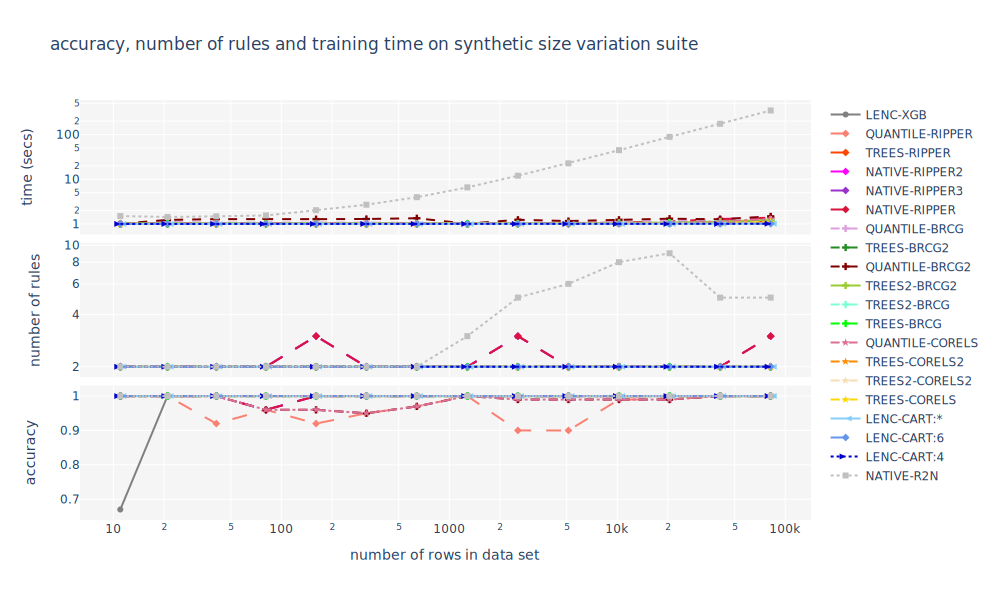

In [237]:
def extract(name):
    return int(name.split('_')[2])+1

synth_size_suite_df['label_complexity'] = synth_size_suite_df['data_set'].map(extract)
synth_size_suite_df = synth_size_suite_df.sort_values('label_complexity', ignore_index=True)

triple_chart(pipelines=ALL_RI_PIPELINES,
           performance_metric='acc',
           complexity_metric='nof_rules',
           df=synth_size_suite_df,
           df_long_name='synthetic size variation suite',
           x_sel='label_complexity',
           x_title='number of rows in data set',
           x_log=True)

## Trade-Off Predictive Performance vs. Model Complexity Chart for a single data set

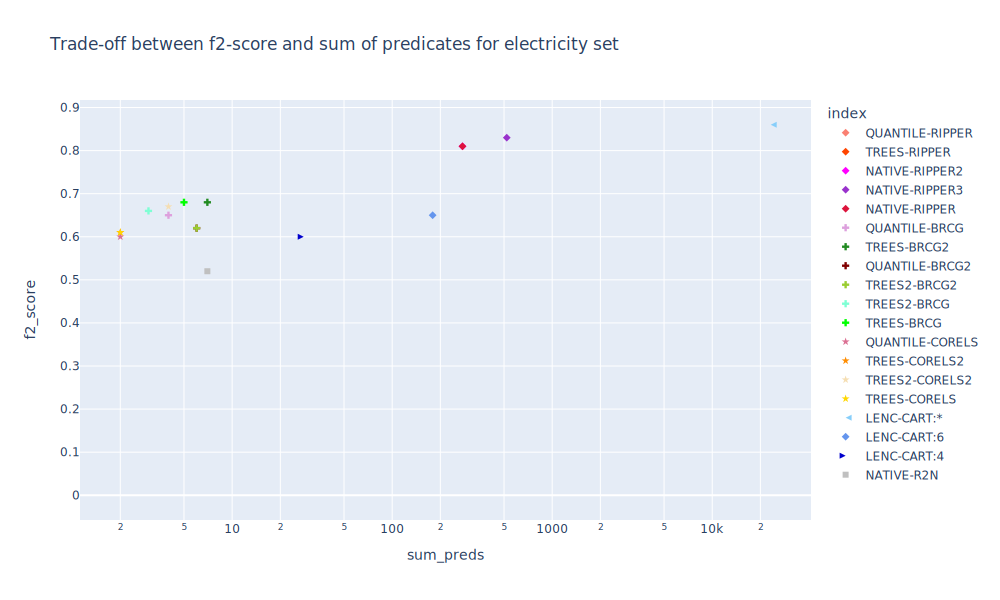

In [238]:
data_set = 'electricity'
df = full_df[full_df['data_set'] == data_set]
# print(df)

pipelines = ALL_RI_PIPELINES # , 'QUANTILE-BRCG', 'QUANTILE-CORELS'
metric = 'f2' # adj_bal_acc

metrics = [ p + '_' + metric for p in pipelines]
df_f2 = df[metrics]
# print(df_f2.head())
data_set_key = df_f2.index[0]

column_transform = {x:x.split('_')[0] for x in df_f2.columns.to_list()}
df_f2 = df_f2.rename(columns=column_transform).transpose()

# print(df_f2.head())

metric = 'sum_preds' # nof_rules sum_preds
# metrics = ['NATIVE-RIPPER_sum_preds', 'TREES-BRCG_sum_preds', 'TREES-CORELS_sum_preds', 'NATIVE-R2N_sum_preds', 'TREES-BRCG2_sum_preds']
metrics = [ p + '_' + metric for p in pipelines]

df_sum_preds = df[metrics]
column_transform = {x:x.split('_')[0] for x in df_sum_preds.columns.to_list()}
df_sum_preds = df_sum_preds.rename(columns=column_transform).transpose()

# print(df_sum_preds.head())
# print(df_sum_preds.index)


df_scatter = pd.DataFrame()
df_scatter['f2_score'] = df_f2[data_set_key]
df_scatter['sum_preds'] = df_sum_preds[data_set_key]
df_scatter.head()

fig = px.scatter(df_scatter, x="sum_preds", y="f2_score", 
                color=df_scatter.index,
                symbol=df_scatter.index,
                color_discrete_sequence=[style_map[p][0] for p in df_scatter.index],  # ['crimson', 'limegreen', 'orange', 'blue' ]
                symbol_sequence=[style_map[p][2] for p in df_scatter.index],
                title="Trade-off between f2-score and sum of predicates for {} set".format(data_set)) #  color="species",
fig.update_xaxes(type="log")
fig.update_layout(height=600, width=1000)
fig.show()